# CNN TUNNING with MNIST DATASET
##taken from: Deep MNIST for Experts

In [33]:
##Defining and creating the net

In [34]:
#required imports
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
sess = tf.InteractiveSession()
import time

# Input data loading

In [35]:

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Python optimisation variables
learning_rate = 0.0001
epochs = 5
batch_size = 50



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Input data and placeholders

In [36]:
#Input data and placeholders
# declare the training data placeholders
# input x - for 28 x 28 pixels = 784 - this is the flattened image data that is drawn from 
# mnist.train.nextbatch()
x = tf.placeholder(tf.float32, [None, 784])
# dynamically reshape the input
x_shaped = tf.reshape(x, [-1, 28, 28, 1])
# now declare the output data placeholder - 10 digits
y_ = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
sess.run(tf.global_variables_initializer())
y = tf.matmul(x,W) + b


# Step by step constructiong the CNN
#i appreciuate this code cuz it's a step by step cnn construction!

In [37]:
#Weight Initialization


def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [38]:
#pooling
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [39]:
#ConvLayers
##First_convLayer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [40]:
#image_reshape
x_image = tf.reshape(x, [-1,28,28,1])

In [41]:
##ConvOperation
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [42]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [43]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout implementation

In [44]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [45]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2


In [46]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
 

# SimpleNet

In [18]:

import numpy as np
from pylab import *
%matplotlib inline
import tempfile

nbiter=10000
#Iterations
x_iter=zeros(nbiter//100)
#save_trainAcc
Acctrainarray=zeros(nbiter//100)
#save_testAcc
Acctestarray=zeros(nbiter//100)
#save_trainloss
losstrainarray=zeros(nbiter//100)

#define the parametres used for the evaluation
#take the labels

#take the predicte²²d values

tmps1=time.time() #pour récupérer le temps de tout l'entrainement
i=0



cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(nbiter):
  batch = mnist.train.next_batch(50)



  batch_test = mnist.test.next_batch(50)
  

  if i%100 == 0:   
    x_iter[i//100] = i
    
    #loss
    losstrainarray[i//100] = cross_entropy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    
    
    #accuracies
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    Acctrainarray[i//100] = train_accuracy
    Acctestarray[i//100] = accuracy.eval(feed_dict={
        x:batch_test[0], y_: batch_test[1], keep_prob: 1.0})
    
    print("step %d, training accuracy %g"%(i, train_accuracy))
    
    print("step %d, test accuracy %g"%(i, Acctestarray[i//100]))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

tmps2=time.time()-tmps1
print (" pour la totale = %f" %tmps2)

step 0, training accuracy 0.08
step 0, test accuracy 0.06
step 100, training accuracy 0.86
step 100, test accuracy 0.8
step 200, training accuracy 0.86
step 200, test accuracy 0.82
step 300, training accuracy 0.96
step 300, test accuracy 0.94
step 400, training accuracy 0.88
step 400, test accuracy 0.9
step 500, training accuracy 0.88
step 500, test accuracy 0.92
step 600, training accuracy 0.98
step 600, test accuracy 0.92
step 700, training accuracy 0.96
step 700, test accuracy 0.96
step 800, training accuracy 0.94
step 800, test accuracy 0.96
step 900, training accuracy 0.96
step 900, test accuracy 0.96
step 1000, training accuracy 0.98
step 1000, test accuracy 1
step 1100, training accuracy 1
step 1100, test accuracy 0.98
step 1200, training accuracy 1
step 1200, test accuracy 0.98
step 1300, training accuracy 0.98
step 1300, test accuracy 1
step 1400, training accuracy 0.98
step 1400, test accuracy 0.98
step 1500, training accuracy 0.94
step 1500, test accuracy 0.98
step 1600, tra

Text(0,0.5,'train_accuracy_standard')

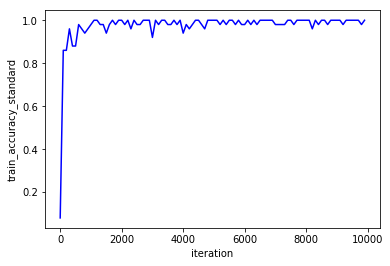

In [19]:
#Plotting the curves
from pylab import *
%matplotlib inline
import tempfile

_, ax1 = subplots()

ax1.plot(x_iter,Acctrainarray,'b')

ax1.set_xlabel('iteration')
ax1.set_ylabel('train_accuracy_standard')



Text(0,0.5,'test_accuracystandard')

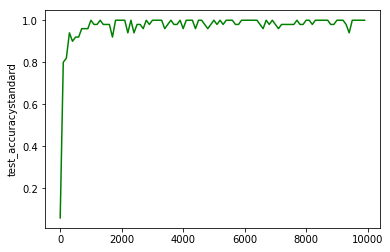

In [20]:
#Plotting the curves
from pylab import *
%matplotlib inline
import tempfile

_, ax1 = subplots()

ax1.plot(x_iter, Acctestarray, 'g')


ax1.set_ylabel('test_accuracystandard')


Text(0,0.5,'lossTrainStandard')

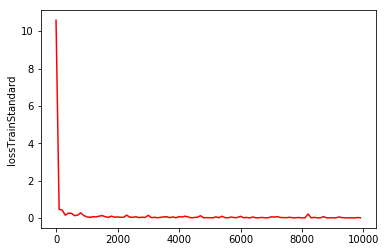

In [21]:

_, ax1 = subplots()

ax1.plot(x_iter, losstrainarray, 'r')


ax1.set_ylabel('lossTrainStandard')


In [22]:
plt.savefig('standardCNN.png')


# CNN Evalutaion

In [23]:
#required imports
from sklearn.metrics import confusion_matrix



# L1 REGULARIZATION¶

In [22]:
delta=0.05
l1_regularizer = tf.contrib.layers.l1_regularizer(
   scale=0.005, scope=None)
 
weights = tf.trainable_variables() # all vars of your graph
regularization_penalty = tf.contrib.layers.apply_regularization(l1_regularizer, weights)
 
cross_entropy = cross_entropy + delta*regularization_penalty # this loss needs to be minimized
 

In [23]:

import numpy as np
from pylab import *
%matplotlib inline
import tempfile

nbiter=10000
#Iterations
x_iter=zeros(nbiter//100)
#save_trainAcc
Acctrainarray=zeros(nbiter//100)
#save_testAcc
Acctestarray=zeros(nbiter//100)
#save_trainloss
losstrainarray=zeros(nbiter//100)

#define the parametres used for the evaluation
#take the labels

#take the predicte²²d values

tmps1=time.time() #pour récupérer le temps de tout l'entrainement
i=0



cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(nbiter):
  batch = mnist.train.next_batch(50)



  batch_test = mnist.test.next_batch(50)
  

  if i%100 == 0:   
    x_iter[i//100] = i
    
    #loss
    losstrainarray[i//100] = cross_entropy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    
    
    #accuracies
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    Acctrainarray[i//100] = train_accuracy
    Acctestarray[i//100] = accuracy.eval(feed_dict={
        x:batch_test[0], y_: batch_test[1], keep_prob: 1.0})
    
    print("step %d, training accuracy %g"%(i, train_accuracy))
    
    print("step %d, test accuracy %g"%(i, Acctestarray[i//100]))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

tmps2=time.time()-tmps1
print (" pour la totale = %f" %tmps2)

step 0, training accuracy 0.14
step 0, test accuracy 0.04
step 100, training accuracy 0.92
step 100, test accuracy 0.8
step 200, training accuracy 0.9
step 200, test accuracy 0.94
step 300, training accuracy 0.94
step 300, test accuracy 0.96
step 400, training accuracy 0.98
step 400, test accuracy 0.92
step 500, training accuracy 0.98
step 500, test accuracy 1
step 600, training accuracy 0.96
step 600, test accuracy 0.92
step 700, training accuracy 0.96
step 700, test accuracy 0.94
step 800, training accuracy 0.92
step 800, test accuracy 1
step 900, training accuracy 0.96
step 900, test accuracy 0.98
step 1000, training accuracy 0.98
step 1000, test accuracy 0.94
step 1100, training accuracy 0.98
step 1100, test accuracy 1
step 1200, training accuracy 0.94
step 1200, test accuracy 0.96
step 1300, training accuracy 0.96
step 1300, test accuracy 0.96
step 1400, training accuracy 0.96
step 1400, test accuracy 0.96
step 1500, training accuracy 1
step 1500, test accuracy 0.96
step 1600, tra

Text(0,0.5,'train_accuracy_standard')

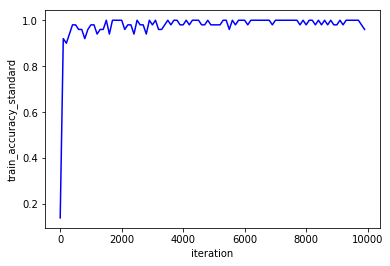

In [24]:
#Plotting the curves

_, ax1 = subplots()

ax1.plot(x_iter,Acctrainarray,'b')

ax1.set_xlabel('iteration')
ax1.set_ylabel('train_accuracy_standard')



Text(0,0.5,'test_accuracystandard')

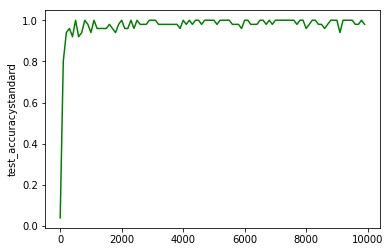

In [26]:

_, ax1 = subplots()

ax1.plot(x_iter, Acctestarray, 'g')


ax1.set_ylabel('test_accuracystandard')


Text(0,0.5,'lossTrainStandard')

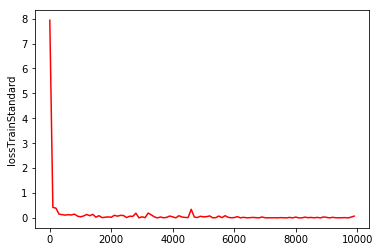

In [27]:
_, ax1 = subplots()

ax1.plot(x_iter, losstrainarray, 'r')


ax1.set_ylabel('lossTrainStandard')

# L2 REGULARIZATION

In [28]:
beta = 0.01

# Original loss function
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
# Loss function using L2 Regularization
regularizer = tf.nn.l2_loss(W_conv1 ) + tf.nn.l2_loss(W_conv2 ) + tf.nn.l2_loss(W_fc1 )+ tf.nn.l2_loss(W_fc2 )
cross_entropy = tf.reduce_mean(cross_entropy + beta * regularizer)


In [29]:

import numpy as np
from pylab import *
%matplotlib inline
import tempfile

nbiter=10000
#Iterations
x_iter=zeros(nbiter//100)
#save_trainAcc
Acctrainarray=zeros(nbiter//100)
#save_testAcc
Acctestarray=zeros(nbiter//100)
#save_trainloss
losstrainarray=zeros(nbiter//100)

#define the parametres used for the evaluation
#take the labels

#take the predicte²²d values

tmps1=time.time() #pour récupérer le temps de tout l'entrainement
i=0



cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(nbiter):
  batch = mnist.train.next_batch(50)



  batch_test = mnist.test.next_batch(50)
  

  if i%100 == 0:   
    x_iter[i//100] = i
    
    #loss
    losstrainarray[i//100] = cross_entropy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    
    
    #accuracies
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    Acctrainarray[i//100] = train_accuracy
    Acctestarray[i//100] = accuracy.eval(feed_dict={
        x:batch_test[0], y_: batch_test[1], keep_prob: 1.0})
    
    print("step %d, training accuracy %g"%(i, train_accuracy))
    
    print("step %d, test accuracy %g"%(i, Acctestarray[i//100]))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

tmps2=time.time()-tmps1
print (" pour la totale = %f" %tmps2)

step 0, training accuracy 0.12
step 0, test accuracy 0.18
step 100, training accuracy 0.76
step 100, test accuracy 0.68
step 200, training accuracy 0.96
step 200, test accuracy 0.98
step 300, training accuracy 0.94
step 300, test accuracy 0.92
step 400, training accuracy 0.98
step 400, test accuracy 1
step 500, training accuracy 0.92
step 500, test accuracy 0.96
step 600, training accuracy 0.96
step 600, test accuracy 0.98
step 700, training accuracy 0.96
step 700, test accuracy 0.94
step 800, training accuracy 0.92
step 800, test accuracy 0.98
step 900, training accuracy 0.94
step 900, test accuracy 0.98
step 1000, training accuracy 1
step 1000, test accuracy 0.98
step 1100, training accuracy 0.98
step 1100, test accuracy 0.96
step 1200, training accuracy 1
step 1200, test accuracy 1
step 1300, training accuracy 0.96
step 1300, test accuracy 0.98
step 1400, training accuracy 1
step 1400, test accuracy 1
step 1500, training accuracy 0.98
step 1500, test accuracy 1
step 1600, training a

Text(0,0.5,'train_accuracy_standard')

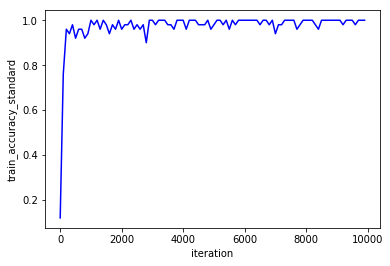

In [30]:
#Plotting the curves

_, ax1 = subplots()

ax1.plot(x_iter,Acctrainarray,'b')

ax1.set_xlabel('iteration')
ax1.set_ylabel('train_accuracy_standard')



Text(0,0.5,'test_accuracystandard')

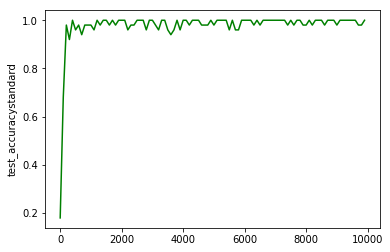

In [31]:

_, ax1 = subplots()

ax1.plot(x_iter, Acctestarray, 'g')


ax1.set_ylabel('test_accuracystandard')


Text(0,0.5,'lossTrainStandard')

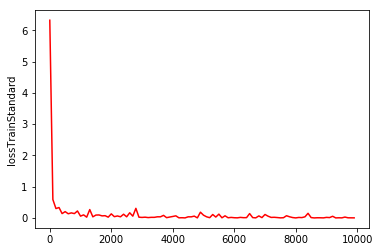

In [32]:
_, ax1 = subplots()

ax1.plot(x_iter, losstrainarray, 'r')


ax1.set_ylabel('lossTrainStandard')

# METRICS

In [22]:

PRED=tf.argmax(y_conv,1)
label=tf.argmax(y_,1)
PRED.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})


array([3, 3, 3, 1, 3, 0, 8, 0, 0, 3, 0, 0, 3, 0, 1, 5, 3, 5, 0, 0, 1, 0, 0,
       1, 1, 0, 5, 0, 0, 9, 0, 0, 0, 9, 3, 8, 8, 3, 0, 0, 1, 0, 0, 0, 8, 0,
       0, 0, 3, 1])

In [25]:
predicted=PRED.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
true=label.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})

In [27]:
#ConfusionMatrix
from sklearn.metrics import confusion_matrix
ConfusionMatrix=confusion_matrix(predicted,true)

In [ ]:
#Early_stopping
##condition


# early stopping

In [ ]:

import numpy as np
from pylab import *
%matplotlib inline
import tempfile
nbiter = 200
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
#Iterations
x_iter=zeros(nbiter)
#save_trainAcc
Acctrainarray=zeros(nbiter)
#save_testAcc
Acctestarray=zeros(nbiter)
#save_trainloss
losstrainarray=zeros(nbiter)
#save_testloss
losstestarray=zeros(nbiter)
#define the parametres used for the evaluation
#take the labels

#take the predicte²²d values

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


sess.run(tf.global_variables_initializer())

for i in range(nbiter):
  batch = mnist.train.next_batch(50)
  if i%1 == 0:
    
    x_iter[i] = i
    #loss
    losstrainarray[i] = cross_entropy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    losstestarray[i] = cross_entropy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
    if ç
        if(losstrainarray[i]> losstrainarray[i-1]  and losstrainarray[i]> losstrainarray[i-2] and losstrainarray[i]> losstrainarray[i-3]  and losstrainarray[i]> losstrainarray[i-4])
            break
    #accuracies
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    Acctrainarray[i] = train_accuracy
    Acctestarray[i] = accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
    print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))